Import necessary packages ()

In [1]:
import pandas as pd
import psycopg2
from psycopg2 import Error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Establish connections to the database

In [2]:
try:
    # Connect to an existing database
    connection = psycopg2.connect(database="2022-everything-team12", 
                            user='ycj6475', 
                            password='White001!', 
                            host='pg.analytics.northwestern.edu', 
                            port= '5432')

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")
except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
df = pd.read_sql("select * from \"aggtrnsactdaily\"", connection);
if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 


You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 

PostgreSQL connection is closed


/tmp/ipykernel_590841/86078971.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("select * from \"aggtrnsactdaily\"", connection);


In [3]:
#--------------------
# check null value counts
df.notnull().sum()

saledate              389
nstores               389
nsku                  389
totalquantity         389
avgquantity           389
totalamt              389
avgamt                389
minamt                389
maxamt                389
totalorigprice        389
avgorigprice          389
minorigprice          389
maxorigprice          389
totalretail           389
avgretail             389
minretail             389
maxretail             389
avgretailtrnsact      389
totalcost             389
avgcost               389
mincost               389
maxcost               389
avgcosttrnsact        389
totaldiscount         389
avgdiscounttrnsact    389
mindiscount           389
maxdiscount           389
totalprofit           389
avgprofittrnsact      389
minprofit             389
maxprofit             389
nstore                389
ncities               389
ndept                 389
nvendors              389
avgvendorsstore       389
dtype: int64

In [4]:
unemployee = pd.read_csv("UNRATE.csv")
cpi = pd.read_csv("cpi.csv")
dff = pd.read_csv("DFF.csv")

In [5]:
df['saledate']= pd.to_datetime(df['saledate'])
cpi['DATE']= pd.to_datetime(cpi['DATE'])
unemployee['DATE']= pd.to_datetime(unemployee['DATE'])
dff['DATE']= pd.to_datetime(dff['DATE'])

In [6]:
df_combined = pd.merge(df.assign(grouper=df['saledate'].dt.to_period('M')),
               cpi.assign(grouper=cpi['DATE'].dt.to_period('M')),
               how='left', on='grouper')

df_combined = pd.merge(df_combined.assign(grouper=df_combined['saledate'].dt.to_period('M')),
               unemployee.assign(grouper=unemployee['DATE'].dt.to_period('M')),
               how='left', on='grouper')

df_combined = pd.merge(df_combined.assign(grouper=df_combined['saledate'].dt.to_period('D')),
               dff.assign(grouper=dff['DATE'].dt.to_period('D')),
               how='left', on='grouper')

df_combined

,saledate,nstores,nsku,totalquantity,avgquantity,totalamt,avgamt,minamt,maxamt,totalorigprice,...,ndept,nvendors,avgvendorsstore,grouper,DATE_x,CORESTICKM159SFRBATL,DATE_y,UNRATE,DATE,DFF
0,2004-08-01,323,61741,188073,783,6035654.36,25148.559833,0.0,895.0,4467905.60,...,58,852,2,2004-08-01,2004-08-01,2.257729,2004-08-01,5.4,2004-08-01,1.29
1,2004-08-02,324,59183,177143,208,5637192.49,6624.197991,0.0,1200.0,4174584.51,...,58,827,2,2004-08-02,2004-08-01,2.257729,2004-08-01,5.4,2004-08-02,1.28
2,2004-08-03,324,62593,212625,233,6569613.74,7219.355758,0.0,895.0,4833202.76,...,58,842,2,2004-08-03,2004-08-01,2.257729,2004-08-01,5.4,2004-08-03,1.24
3,2004-08-04,324,65689,218053,241,6874637.33,7604.687312,0.0,895.0,4974026.91,...,58,843,2,2004-08-04,2004-08-01,2.257729,2004-08-01,5.4,2004-08-04,1.22
4,2004-08-05,325,68941,225237,289,7913489.50,10184.671171,0.0,1200.0,5501540.60,...,58,870,2,2004-08-05,2004-08-01,2.257729,2004-08-01,5.4,2004-08-05,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2005-08-23,325,84999,216712,226,7457004.46,7800.213870,0.0,1200.0,5141321.76,...,60,944,2,2005-08-23,2005-08-01,2.264406,2005-08-01,4.9,2005-08-23,3.49
385,2005-08-24,325,140901,466006,496,19248987.11,20521.308220,0.0,1200.0,8398192.33,...,60,1041,3,2005-08-24,2005-08-01,2.264406,2005-08-01,4.9,2005-08-24,3.50
386,2005-08-25,325,134977,422296,442,17062480.18,17885.199350,0.0,1200.0,7772270.13,...,60,1019,3,2005-08-25,2005-08-01,2.264406,2005-08-01,4.9,2005-08-25,3.55
387,2005-08-26,324,144548,482390,525,19215591.82,20932.017233,0.0,1200.0,8968694.40,...,60,1056,3,2005-08-26,2005-08-01,2.264406,2005-08-01,4.9,2005-08-26,3.54


In [7]:
df_combined.columns

Index(['saledate', 'nstores', 'nsku', 'totalquantity', 'avgquantity',
       'totalamt', 'avgamt', 'minamt', 'maxamt', 'totalorigprice',
       'avgorigprice', 'minorigprice', 'maxorigprice', 'totalretail',
       'avgretail', 'minretail', 'maxretail', 'avgretailtrnsact', 'totalcost',
       'avgcost', 'mincost', 'maxcost', 'avgcosttrnsact', 'totaldiscount',
       'avgdiscounttrnsact', 'mindiscount', 'maxdiscount', 'totalprofit',
       'avgprofittrnsact', 'minprofit', 'maxprofit', 'nstore', 'ncities',
       'ndept', 'nvendors', 'avgvendorsstore', 'grouper', 'DATE_x',
       'CORESTICKM159SFRBATL', 'DATE_y', 'UNRATE', 'DATE', 'DFF'],
      dtype='object')

In [8]:
df_combined = df_combined.drop(columns = ["grouper","DATE_x","DATE_y","DATE"])

check the shape of total revenue column, no trend oe seasonality found

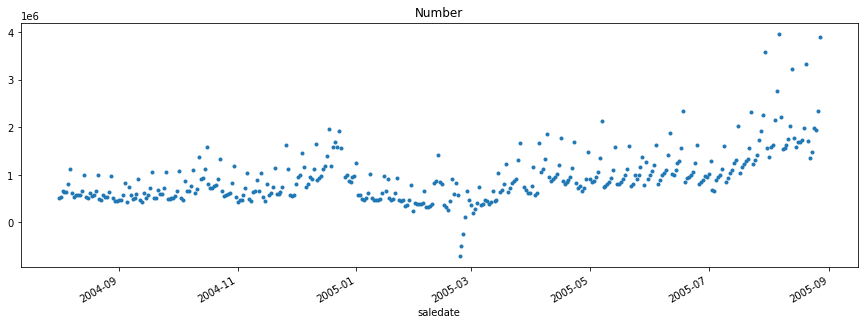

In [9]:
df_groupyed = df_combined
color_pal = sns.color_palette()
# set df index as date
df_ts = df_groupyed.set_index('saledate')
df_ts.index = pd.to_datetime(df_ts.index)
# check distribution of revenue (no pattern found)
df_ts_draw = df_ts["totalprofit"]
df_ts_draw.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Number')
plt.show()


In [10]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofmonth'] = df.index.day
    return df

# create time series features
df_ts = create_features(df_ts)
df_ts

,nstores,nsku,totalquantity,avgquantity,totalamt,avgamt,minamt,maxamt,totalorigprice,avgorigprice,...,avgvendorsstore,CORESTICKM159SFRBATL,UNRATE,DFF,hour,dayofweek,quarter,month,year,dayofmonth
saledate,,,,,,,,,,,,,,,,,,,,,
2004-08-01,323,61741,188073,783,6035654.36,25148.559833,0.0,895.0,4467905.60,23.756231,...,2,2.257729,5.4,1.29,0,6,3,8,2004,1
2004-08-02,324,59183,177143,208,5637192.49,6624.197991,0.0,1200.0,4174584.51,23.566184,...,2,2.257729,5.4,1.28,0,0,3,8,2004,2
2004-08-03,324,62593,212625,233,6569613.74,7219.355758,0.0,895.0,4833202.76,22.731112,...,2,2.257729,5.4,1.24,0,1,3,8,2004,3
2004-08-04,324,65689,218053,241,6874637.33,7604.687312,0.0,895.0,4974026.91,22.811091,...,2,2.257729,5.4,1.22,0,2,3,8,2004,4
2004-08-05,325,68941,225237,289,7913489.50,10184.671171,0.0,1200.0,5501540.60,24.425563,...,2,2.257729,5.4,1.30,0,3,3,8,2004,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-23,325,84999,216712,226,7457004.46,7800.213870,0.0,1200.0,5141321.76,23.724214,...,2,2.264406,4.9,3.49,0,1,3,8,2005,23
2005-08-24,325,140901,466006,496,19248987.11,20521.308220,0.0,1200.0,8398192.33,18.021640,...,3,2.264406,4.9,3.50,0,2,3,8,2005,24
2005-08-25,325,134977,422296,442,17062480.18,17885.199350,0.0,1200.0,7772270.13,18.404792,...,3,2.264406,4.9,3.55,0,3,3,8,2005,25


In [11]:
orignal_features = list(df.columns)
orignal_features.remove('saledate')
orignal_features

['nstores',
 'nsku',
 'totalquantity',
 'avgquantity',
 'totalamt',
 'avgamt',
 'minamt',
 'maxamt',
 'totalorigprice',
 'avgorigprice',
 'minorigprice',
 'maxorigprice',
 'totalretail',
 'avgretail',
 'minretail',
 'maxretail',
 'avgretailtrnsact',
 'totalcost',
 'avgcost',
 'mincost',
 'maxcost',
 'avgcosttrnsact',
 'totaldiscount',
 'avgdiscounttrnsact',
 'mindiscount',
 'maxdiscount',
 'totalprofit',
 'avgprofittrnsact',
 'minprofit',
 'maxprofit',
 'nstore',
 'ncities',
 'ndept',
 'nvendors',
 'avgvendorsstore']

In [12]:
# TODO: add lags
def create_lag_feature(df, column):
    '''
    Create time lagging features
    '''
    df = df.copy()
    df[column + '_1'] = df[column].shift(1)
    df[column + '_2'] = df[column].shift(2)
    df[column + '_3'] = df[column].shift(3)
    df[column + '_4'] = df[column].shift(4)
    df[column + '_5'] = df[column].shift(5)
    df[column + '_6'] = df[column].shift(6)
    df[column + '_7'] = df[column].shift(7)
    df[column + '_14'] = df[column].shift(14)
    df[column + '_28'] = df[column].shift(28)
    return df

orignal_features = list(df.columns)
orignal_features.remove('saledate')

for col in orignal_features:
    df_ts = create_lag_feature(df_ts, col)


# df_model = pd.DataFrame(columns = df_ts.columns)
# for state in df_ts['state'].drop_duplicates().tolist():
#     df_part = df_ts[df_ts['state']==state]
#     for col in orignal_features:
#         df_part = create_lag_feature(df_part, col)
#     df_model = pd.concat([df_model, df_part])
# df_model




In [13]:
orignal_features.remove('totalprofit')
df_model = df_ts
df_ts_lagged = df_model.drop(orignal_features, axis=1)
df_ts_lagged

,totalprofit,CORESTICKM159SFRBATL,UNRATE,DFF,hour,dayofweek,quarter,month,year,dayofmonth,...,nvendors_28,avgvendorsstore_1,avgvendorsstore_2,avgvendorsstore_3,avgvendorsstore_4,avgvendorsstore_5,avgvendorsstore_6,avgvendorsstore_7,avgvendorsstore_14,avgvendorsstore_28
saledate,,,,,,,,,,,,,,,,,,,,,
2004-08-01,511060.0,2.257729,5.4,1.29,0,6,3,8,2004,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-02,532033.0,2.257729,5.4,1.28,0,0,3,8,2004,2,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-03,659895.0,2.257729,5.4,1.24,0,1,3,8,2004,3,...,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-04,631430.0,2.257729,5.4,1.22,0,2,3,8,2004,4,...,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-05,635209.0,2.257729,5.4,1.30,0,3,3,8,2004,5,...,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-23,1477840.0,2.264406,4.9,3.49,0,1,3,8,2005,23,...,968.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0
2005-08-24,1982620.0,2.264406,4.9,3.50,0,2,3,8,2005,24,...,1073.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,3.0
2005-08-25,1943150.0,2.264406,4.9,3.55,0,3,3,8,2005,25,...,1069.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,3.0


In [14]:
# one hot encoding for state variable
df_ts_lagged = pd.get_dummies(df_ts_lagged)
df_ts_lagged.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 389 entries, 2004-08-01 to 2005-08-27
Columns: 325 entries, totalprofit to avgvendorsstore_28
dtypes: float64(319), int64(6)
memory usage: 990.7 KB


# Modeling:

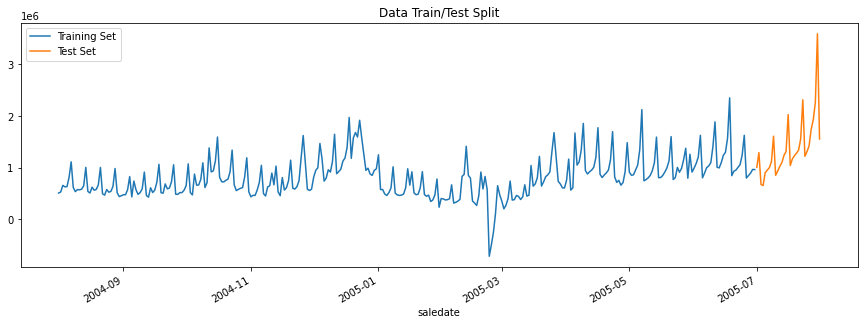

In [15]:
df_ts = df_ts_lagged
# df_ts.loc['2005-07-30', 'totalprofit'] = df_ts.loc['2005-07-29', 'totalprofit']
leftout = df_ts.loc[df_ts.index >= '08-01-2005']
df_ts = df_ts.loc[df_ts.index < '08-01-2005']
# train_test split
train = df_ts.loc[df_ts.index < '07-01-2005']
test = df_ts.loc[df_ts.index >= '07-01-2005']
# plot the train test dataset
train_ts_draw = train["totalprofit"]
test_ts_draw = test["totalprofit"]
fig, ax = plt.subplots(figsize=(15, 5))
train_ts_draw.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test_ts_draw.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test Set'])
plt.show()

# Scaling Data

In [16]:
# split the data with labels
X_train = train.drop('totalprofit', axis = 1)
y_train = train['totalprofit']
X_test = test.drop('totalprofit', axis = 1)
y_test = test['totalprofit']

In [17]:
# standardlize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
standardX_train = sc.transform(X_train)
standardX_test = sc.transform(X_test)
X_Train_standardlized = pd.DataFrame(standardX_train, columns = list(X_train.columns))
X_Test_standardlized = pd.DataFrame(standardX_test, columns = list(X_test.columns))


In [18]:
# minmaxScale the data
from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()
mc.fit(X_train)
minMaxX_train = mc.transform(X_train)
minMaxX_test = mc.transform(X_test)
X_Train_minmax = pd.DataFrame(minMaxX_train, columns = list(X_train.columns))
X_Test_minmax = pd.DataFrame(minMaxX_test, columns = list(X_test.columns))


# XGboost Model

In [19]:
# do time series train test split
from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

import sklearn.metrics as metrics
def show_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    

In [20]:
# tune the XGBoost model
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# clf = GridSearchCV(estimator=xgbr,
#                    param_grid=params,
#                    cv=cv,
#                    scoring='neg_mean_squared_error',
#                    verbose=1)
params = { 'max_depth': range(3,10,2),
            'min_child_weight':range(1,6,2),
           'learning_rate': [0.1,0.01,0.01],
           'n_estimators': [100, 500, 1000],
           }
xgbr = xgb.XGBRegressor(seed = 400)
clf = RandomizedSearchCV(xgbr, params, n_iter = 100, n_jobs=-1, scoring='r2',cv=cv, random_state=1,verbose = 3)
clf.fit(X_train, y_train,verbose=100)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=No...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.01],
                                        'max_depth': range(3, 10, 2),
                                        'min_child_weight': range(1, 6, 2),
                                        'n_estimators': [100, 500, 1000]},
                   random_state=1, scoring='r2', verbose=3)

In [ ]:
# use the tuned results to fit the xgboost regressor model
reg_tuned = clf.best_estimator_
reg_tuned.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=1)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

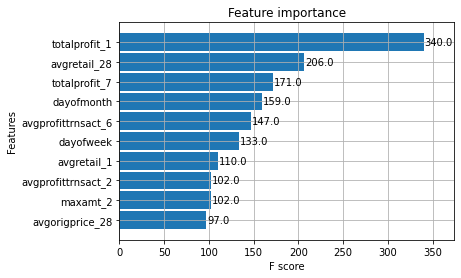

In [22]:
from xgboost import plot_importance, plot_tree
# get the variable importance of XGboost model
plot_importance(reg_tuned,max_num_features=10,height=0.9)



In [23]:
# do the prediction
y_pred = reg_tuned.predict(X_test)
X_test['prediction'] = y_pred
test_pred = pd.concat([X_test, X_train], sort=False)

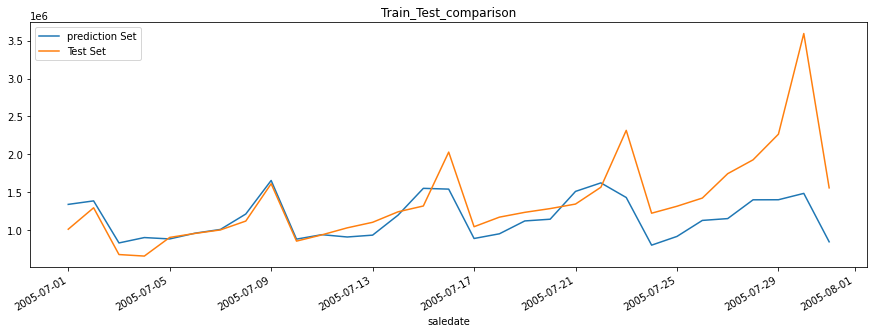

In [24]:
# graph the distribution of prediction vs actual
test_ts_draw = test["totalprofit"]
test_prediction = test_pred["prediction"]
fig, ax = plt.subplots(figsize=(15, 5))
test_prediction.plot(ax=ax, label='prediction Set', title='Train_Test_comparison')
test_ts_draw.plot(ax=ax, label='Test Set')
ax.legend(['prediction Set', 'Test Set'])
plt.show()

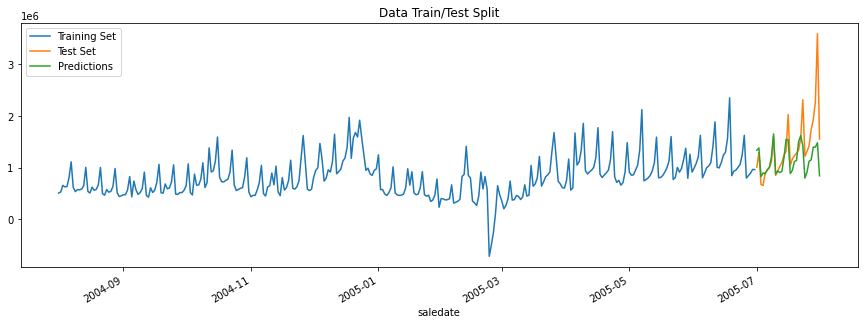

In [25]:
# graph the distribution of prediction vs actual
train_ts_draw = train["totalprofit"]
test_ts_draw = test["totalprofit"]
test_prediction = test_pred["prediction"]
fig, ax = plt.subplots(figsize=(15, 5))
train_ts_draw.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test_ts_draw.plot(ax=ax, label='Test Set')
test_prediction.plot(ax=ax, label='Predictions')
ax.legend(['Training Set', 'Test Set','Predictions'])
plt.show()

In [27]:
show_results(y_test, y_pred)

explained_variance:  0.3426
r2:  0.1953
MAE:  313892.9657
MSE:  265609305525.304
RMSE:  515372.9771


In [28]:
# training on the standardlized dataset
# tune the XGBoost model
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': range(3,10,2),
            'min_child_weight':range(1,6,2),
           'learning_rate': [0.1,0.01,0.01],
           'n_estimators': [100, 500, 1000],
           }
xgbr = xgb.XGBRegressor(seed = 400)
clf = RandomizedSearchCV(xgbr, params, n_iter = 100, n_jobs=-1, scoring='r2',cv=cv, random_state=1,verbose = 0)
clf.fit(X_Train_standardlized, y_train,
        eval_set=[(X_Train_standardlized, y_train), (X_Test_standardlized, y_test)],
        verbose=0)



RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=No...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.01],
                                        'max_depth': range(3, 10, 2),
                                        'min_child_weight': range(1, 6, 2),
                                        'n_estimators': [100, 500, 1000]},
                   random_state=1, scoring='r2')

[0]	validation_0-rmse:887256.94333	validation_1-rmse:1482941.62715
[100]	validation_0-rmse:369843.50063	validation_1-rmse:820484.69613
[200]	validation_0-rmse:187475.32736	validation_1-rmse:613974.02075
[300]	validation_0-rmse:124192.48115	validation_1-rmse:538266.89695
[400]	validation_0-rmse:98271.81441	validation_1-rmse:528841.92465
[500]	validation_0-rmse:85521.44990	validation_1-rmse:522135.40643
[600]	validation_0-rmse:75355.65004	validation_1-rmse:518904.21142
[700]	validation_0-rmse:66946.54308	validation_1-rmse:516978.58393
[800]	validation_0-rmse:59613.29103	validation_1-rmse:515700.87864
[900]	validation_0-rmse:53243.90970	validation_1-rmse:515413.14564
[999]	validation_0-rmse:47904.65117	validation_1-rmse:515372.96468


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

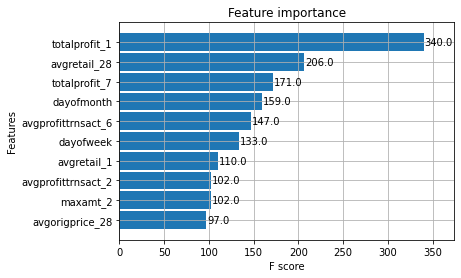

In [29]:
reg_tuned = clf.best_estimator_
reg_tuned.fit(X_Train_standardlized, y_train,
        eval_set=[(X_Train_standardlized, y_train), (X_Test_standardlized, y_test)],
        verbose=100)

from xgboost import plot_importance, plot_tree
# get the variable importance of XGboost model
plot_importance(reg_tuned,max_num_features=10,height=0.9)

In [30]:
y_pred = reg_tuned.predict(X_Test_standardlized)
show_results(y_test, y_pred)

explained_variance:  0.3426
r2:  0.1953
MAE:  313892.9657
MSE:  265609305525.304
RMSE:  515372.9771


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[0]	validation_0-rmse:887256.94333	validation_1-rmse:1482941.62715
[100]	validation_0-rmse:369843.50063	validation_1-rmse:820484.69613
[200]	validation_0-rmse:187475.32736	validation_1-rmse:613974.02075
[300]	validation_0-rmse:124192.48115	validation_1-rmse:538266.89695
[400]	validation_0-rmse:98271.81441	validation_1-rmse:528841.92465
[500]	validation_0-rmse:85521.44990	validation_1-rmse:522135.40643
[600]	validation_0-rmse:75355.65004	validation_1-rmse:518904.21142
[700]	validation_0-rmse:66946.54308	validation_1-rmse:516978.58393
[800]	validation_0-rmse:59613.29103	validation_1-rmse:515700.87864
[900]	validation_0-rmse:53243.90970	validation_1-rmse:515413.14564
[999]	validation_0-rmse:47904.65117	validation_1-rmse:515372.96468


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

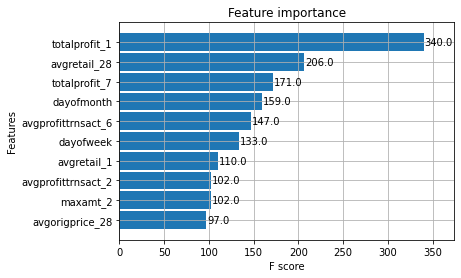

In [31]:
# training on the min-max scaled dataset
import xgboost as xgb
# tune the XGBoost model
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': range(3,10,2),
            'min_child_weight':range(1,6,2),
           'learning_rate': [0.1,0.01,0.01],
           'n_estimators': [100, 500, 1000],
           }
xgbr = xgb.XGBRegressor(seed = 400)
clf = RandomizedSearchCV(xgbr, params, n_iter = 100, n_jobs=-1, scoring='r2',cv=cv, random_state=1,verbose = 3)

clf.fit(X_Train_minmax, y_train,verbose=100)
reg_tuned = clf.best_estimator_
reg_tuned.fit(X_Train_minmax, y_train,
        eval_set=[(X_Train_minmax, y_train), (X_Test_minmax, y_test)],
        verbose=100)

from xgboost import plot_importance, plot_tree
# get the variable importance of XGboost model
plot_importance(reg_tuned,max_num_features=10,height=0.9)


In [32]:
y_pred = reg_tuned.predict(X_Test_minmax)
# X_Test_standardlized['prediction'] = y_pred
test_pred = pd.concat([X_Test_minmax, X_Train_minmax], sort=False)
show_results(y_test, y_pred)


explained_variance:  0.3426
r2:  0.1953
MAE:  313892.9657
MSE:  265609305525.304
RMSE:  515372.9771


## Losso

In [20]:
# train the regression model
from sklearn.linear_model import LassoCV
from sklearn import linear_model
cv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
clf = linear_model.Lasso()
model = LassoCV(cv=cv, n_jobs=-1)
y_train = pd.DataFrame(y_train)
def inpute_missing_mean(df):
    df = df.copy()
    for i in df.columns[df.isnull().any(axis=0)]:
        df[i].fillna(df[i].mean(),inplace=True)
    return df
X_Train_standardlized_lasso = inpute_missing_mean(X_Train_standardlized)
y_train_lasso = inpute_missing_mean(y_train)
model.fit(X_Train_standardlized_lasso, y_train_lasso)


/nfs/home/ycj6475/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/nfs/home/ycj6475/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.910e+09, tolerance: 2.697e+09
  model = cd_fast.enet_coordinate_descent(
/nfs/home/ycj6475/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.837e+09, tolerance: 1.709e+09
  model = cd_fast.enet_coor

LassoCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
        n_jobs=-1)

In [21]:
X_Train_standardlized.shape

(331, 324)

In [22]:
X_Test_standardlized_lasso = inpute_missing_mean(X_Test_standardlized)
y_pred = model.predict(X_Test_standardlized_lasso)
show_results(y_test, y_pred)

explained_variance:  0.7444
r2:  0.6341
MAE:  229247.8052
MSE:  120768141812.6792
RMSE:  347517.1101


In [23]:
X_Test_standardlized['prediction'] = y_pred
test_pred = pd.concat([X_Test_standardlized, X_Train_standardlized], sort=False)


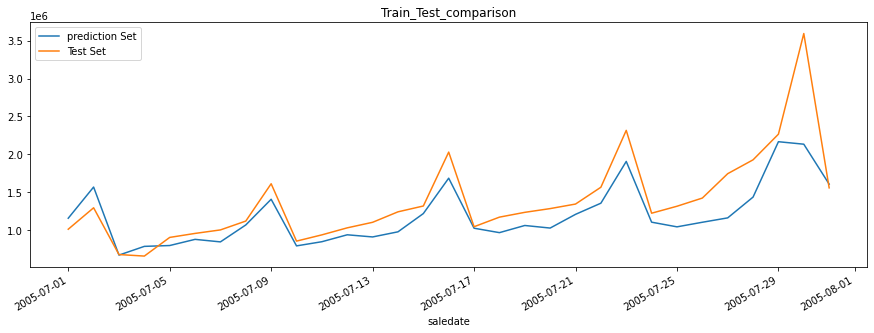

In [24]:
X_test['prediction'] = y_pred
test_pred = pd.concat([X_test, X_train], sort=False)
test_ts_draw = test["totalprofit"]
test_prediction = test_pred["prediction"]
fig, ax = plt.subplots(figsize=(15, 5))
test_prediction.plot(ax=ax, label='prediction Set', title='Train_Test_comparison')
test_ts_draw.plot(ax=ax, label='Test Set')
ax.legend(['prediction Set', 'Test Set'])
plt.show()


In [25]:
features = X_Train_standardlized.columns
importance = np.abs(model.coef_)
feature_importance_lasso = pd.DataFrame(importance, features, columns = ['Coef'])
feature_importance_lasso.sort_values(by=['Coef'], ascending = False).head(10)

,Coef
totalprofit_1,139315.943075
avgprofittrnsact_6,118071.438457
maxprofit_5,37323.649390
maxcost_7,36456.571364
avgquantity_7,35030.333950
avgvendorsstore_7,34690.248612
nvendors_7,33439.493031
avgorigprice_1,29659.944625
totalprofit_7,28251.697840
maxdiscount_5,27713.867506


Test Lasso on the final left data

In [26]:
final_train = df_ts
final_test = leftout
# split the data with labels
X_train = final_train.drop('totalprofit', axis = 1)
y_train = final_train['totalprofit']
X_test = final_test.drop('totalprofit', axis = 1)
y_test = final_test['totalprofit']

In [27]:
# standardlize data
sc = StandardScaler()
sc.fit(X_train)
standardX_train = sc.transform(X_train)
standardX_test = sc.transform(X_test)
X_Train_standardlized = pd.DataFrame(standardX_train, columns = list(X_train.columns))
X_Test_standardlized = pd.DataFrame(standardX_test, columns = list(X_test.columns))


In [28]:
# train the regression model
cv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
clf = linear_model.Lasso()
model = LassoCV(cv=cv, n_jobs=-1)
y_train = pd.DataFrame(y_train)
def inpute_missing_mean(df):
    df = df.copy()
    for i in df.columns[df.isnull().any(axis=0)]:
        df[i].fillna(df[i].mean(),inplace=True)
    return df
X_Train_standardlized_lasso = inpute_missing_mean(X_Train_standardlized)
y_train_lasso = inpute_missing_mean(y_train)


In [29]:
model.fit(X_Train_standardlized_lasso, y_train_lasso)


/nfs/home/ycj6475/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/nfs/home/ycj6475/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.010e+09, tolerance: 1.849e+09
  model = cd_fast.enet_coordinate_descent(
/nfs/home/ycj6475/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.487e+09, tolerance: 1.849e+09
  model = cd_fast.enet_coor

LassoCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
        n_jobs=-1)

In [30]:
X_Test_standardlized_lasso = inpute_missing_mean(X_Test_standardlized)
y_pred = model.predict(X_Test_standardlized_lasso)
show_results(y_test, y_pred)

explained_variance:  0.7203
r2:  0.6626
MAE:  257986.1354
MSE:  174609949168.7626
RMSE:  417863.5533


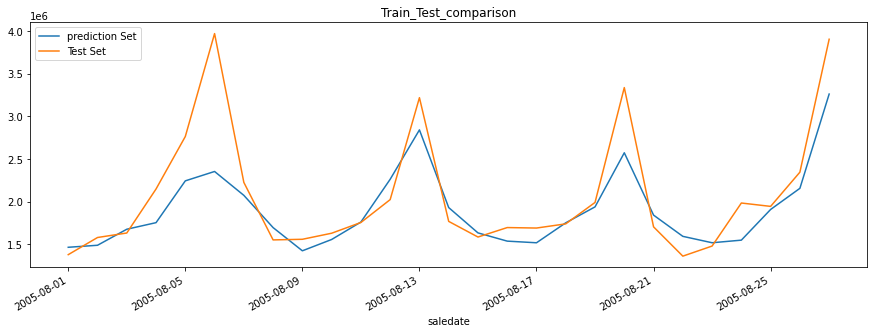

In [31]:
X_test['prediction'] = y_pred
test_pred = pd.concat([X_test, X_train], sort=False)
test_ts_draw = final_test["totalprofit"]
test_prediction = test_pred["prediction"]
fig, ax = plt.subplots(figsize=(15, 5))
test_prediction.plot(ax=ax, label='prediction Set', title='Train_Test_comparison')
test_ts_draw.plot(ax=ax, label='Test Set')
ax.legend(['prediction Set', 'Test Set'])
plt.show()


In [32]:
features = X_Train_standardlized.columns
importance = np.abs(model.coef_)
feature_importance_lasso = pd.DataFrame(importance, features, columns = ['Coef'])
feature_importance_lasso.sort_values(by=['Coef'], ascending = False).head(10)

,Coef
totalprofit_1,164473.565852
avgprofittrnsact_6,151969.488872
avgprofittrnsact_14,47988.344349
totalprofit_7,42951.591581
avgvendorsstore_7,40899.894392
maxprofit_5,39673.124548
maxcost_7,36778.401586
nvendors_3,29473.171503
maxdiscount_5,26160.423525
quarter,25004.709064


In [33]:
# final money amount for August 
sum(y_pred)

51270190.4917618